# Long-Short Equity Strategies

Long short equity strategies generally involve buying (going long) stocks and also selling (going short) shorts. The weights and the number of stocks to go long or short may vary based on the out look of the portfolio manager. If they have a bullish titlt, they may choose to have a net long portfolio. On the other hand ig they have a bearish titlt they may have net short portfolio.

Most times portfolio managers will prefer to stay dollar neutral i.e. go long and short equal dollar amount. This ensures that the strategy remains market neutral.

These strategies generally involve ranking all the stocks in the universe (based on some criteria or factor). The strategy then goes long `top n` ranked stocks and shorts the `bottom n` ranked stocks. 

The ranking can be based on 
- Value factors
- Technical factors
- Momentum factors

Or a combination of the above factors

The portfolio returns are dependent on how well the ranking spreads work out. We will makeup some random data below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
current_factors_values = np.random.normal(0,1,10000)
equity_names = ['Equity' + str(x) for x in range(10000)]

factor_data = pd.Series(current_factors_values, index = equity_names)

factor_data = pd.DataFrame(factor_data, columns=['factor_value'])

factor_data.head()

,factor_value
Equity0,-1.832911
Equity1,0.751536
Equity2,-0.532982
Equity3,-1.181411
Equity4,0.507476


In the above code we made up 10000 equity factors. 

In [3]:
len(factor_data)

10000

Now lets add some random values to those factors. This will act as our future returns for the equities.

In [4]:
future_returns = current_factors_values + np.random.normal(0,1,10000)

return_data = pd.Series(future_returns, index = equity_names)

return_data = pd.DataFrame(return_data, columns = ['Returns'])

data = return_data.join(factor_data)

data.head(10)

,Returns,factor_value
Equity0,-1.979975,-1.832911
Equity1,0.612166,0.751536
Equity2,-0.186578,-0.532982
Equity3,1.209441,-1.181411
Equity4,-1.039612,0.507476
Equity5,-0.734017,0.514521
Equity6,1.910402,0.354395
Equity7,-0.949727,-0.318832
Equity8,-1.598258,-1.659698
Equity9,-0.129542,-1.219689


In the above data frame we have the 10000 factors and the future returns of those factors.

Now that we have the factor values and the returns, we can see what would happen if we ranked our equities based on factors and then entered long and short positions on those stocks.

We will divide the stocks into a basket of 500 stocks.

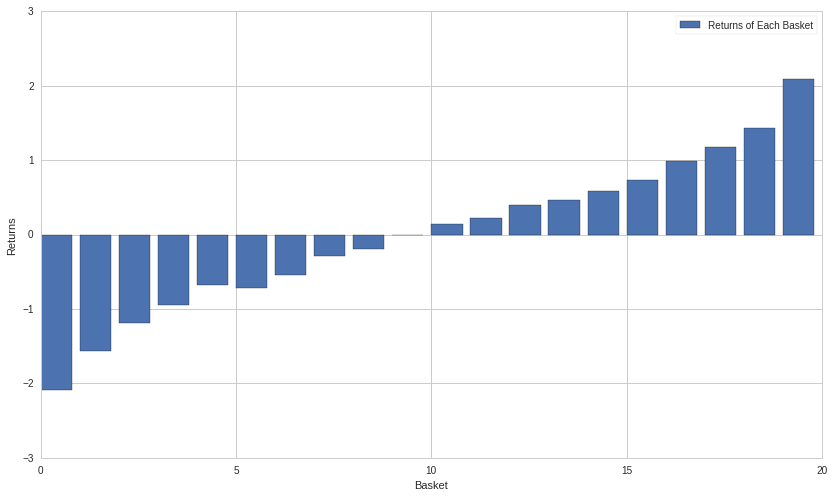

In [5]:
# Ranking all the stocks
ranked_data = data.sort_values('factor_value')

# Dividing them into baskets of 500
number_of_baskets = 10000//500

# Create an empty array to store the returns

basket_returns = np.zeros(number_of_baskets)

# For
for i in range(number_of_baskets):
    
    start = i * 500
    end = i * 500 + 500
    basket_returns[i] = ranked_data[start:end]['Returns'].mean()
    
plt.bar(range(number_of_baskets),
       basket_returns)

plt.ylabel('Returns')
plt.xlabel('Basket')
plt.legend(['Returns of Each Basket']);

We can see above the returns of the different baskets of stocks. Lets calculate the returns if we go long the top basket and short the bottom basket.

In [6]:
basket_returns[number_of_baskets-1] - basket_returns[0]

4.1835166231707799

As we can see the, the strategies edge comes from the ranking schemes that we utilized. 

There are several other things that will affect our strategies.

- Capital Capacity
- Transaction Costs
- Rebalancing Frequency